In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("house_rentle.csv")

In [3]:
data.shape

(645, 8)

In [4]:
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [7]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [9]:
data.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [23]:
mms = MinMaxScaler()
data[['TotalFloor', 'Bedroom']] = mms.fit_transform(data[['TotalFloor', 'Bedroom']])
print(data)

         Sqft  Floor  TotalFloor   Bedroom  Living.Room  Bathroom  Price
0    1177.698      2    0.162162  0.166667            2         2  62000
1    2134.800      5    0.162162  0.500000            2         2  78000
2    1138.560      5    0.162162  0.166667            2         1  58000
3    1458.780      2    0.162162  0.333333            2         2  45000
4     967.776     11    0.351351  0.333333            2         2  45000
..        ...    ...         ...       ...          ...       ...    ...
640  1359.156      7    0.378378  0.333333            2         2  45000
641   377.148      4    0.243243  0.000000            1         1  24800
642   740.064     13    0.351351  0.000000            1         1  45000
643  1707.840      3    0.351351  0.333333            2         2  65000
644  1376.946      6    0.162162  0.333333            2         1  36000

[645 rows x 7 columns]


In [26]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(4,0)

In [25]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 5)
array1 = data['TotalFloor'].to_numpy()
array2 = data[' Bedroom'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(array)
    kmeanModel.fit(array)

    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / array.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_

KeyError: ' Bedroom'

ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

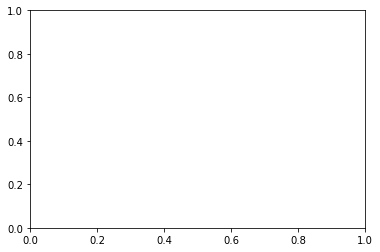

In [21]:
# Using Distortion -
# Tabulating the results -

for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

# Visualizing the result -

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

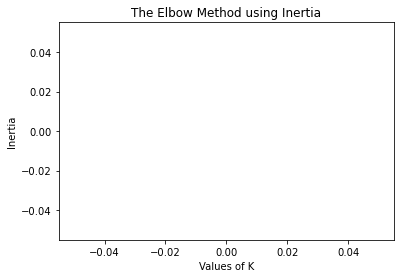

In [27]:
# Using Inertias -
# Tabulating the results -

for key,val in mapping2.items():
    print(str(key)+' : '+str(val))

# Visualizing the result -

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [28]:
# Finding Centroids -Bedroom
data = pd.DataFrame(array, columns=('TotalFloor', 'Bedroom'))
data.head()

kmeans = KMeans(n_clusters=5).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(data['TotalFloor'], data['Bedroom'], c= kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

NameError: name 'array' is not defined